In [13]:
import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

import graphviz 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

from sklearn.metrics import top_k_accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score
import warnings

In [14]:
warnings.filterwarnings('ignore')

### Carregamento do conjunto de dados de todos os anos

In [15]:
ano = 2011
enade_ano = pd.read_csv(f"../../concept_drift/tabela_final_{ano}_treinamento.csv")

### Cross-validation (k = 5)

In [16]:
k = 5

In [17]:
array_folds = np.array_split(enade_ano, k)

In [18]:
for i_fold in range(k):
    
    # Separação dos folds
    
    folds_treinamento = array_folds.copy()
    fold_teste = array_folds[i_fold]
    
    del folds_treinamento[i_fold]
    
    folds_treinamento = pd.concat(folds_treinamento, sort=False)
    
    # Separação em X e y
    
    numero_caracteristicas = enade_ano.shape[1] - 1
    
    X_folds_treinamento = folds_treinamento.iloc[:, 0:numero_caracteristicas]
    y_folds_treinamento = folds_treinamento.iloc[:, -1]
    
    X_fold_teste = fold_teste.iloc[:, 0:numero_caracteristicas]
    y_fold_teste = fold_teste.iloc[:, -1]
    
    # Normalização de treino e teste
    
    normalizador_treinamento = StandardScaler()
    
    normalizador_treinamento.fit(X_folds_treinamento)
    treinamento_normalizado = normalizador_treinamento.transform(X_folds_treinamento)
    
    normalizador_teste = StandardScaler()
    
    normalizador_teste.fit(X_fold_teste)
    teste_normalizado = normalizador_teste.transform(X_fold_teste)
    
    # Busca por hyperparâmetros
    
    parametros_para_busca = {"hidden_layer_sizes": [10, 20, 10], 
              "activation": ["relu", "tanh"],
              "solver": ["adam", "sgd"],
              "learning_rate_init": [0.001, 0.01, 0.1],
              "tol": [0.1, 0.001, 0.0001],
              "alpha": [0.0001, 0.01, 0.1],
              "batch_size": [32, 60, 100]
             }
    
    classificador = MLPClassifier()
    
    busca = HalvingGridSearchCV(classificador, parametros_para_busca, scoring="f1_weighted").fit(treinamento_normalizado, y_folds_treinamento)
    
    busca.best_estimator_.fit(treinamento_normalizado, y_folds_treinamento)
    y_predito = busca.best_estimator_.predict(teste_normalizado)
    
    melhor_classificador = str(busca.best_estimator_)
    resultado = f1_score(y_fold_teste, y_predito, average='weighted')
    
    print(f"Teste: fold {i_fold}")
    print(f"Classificador: \n\n{melhor_classificador}\n")
    print(f"Resultado: {resultado}\n")

Teste: fold 0
Classificador: 

MLPClassifier(activation='tanh', batch_size=32, hidden_layer_sizes=10,
              learning_rate_init=0.01, solver='sgd', tol=0.1)

Resultado: 0.46759350091968116

Teste: fold 1
Classificador: 

MLPClassifier(alpha=0.01, batch_size=60, hidden_layer_sizes=20, solver='sgd')

Resultado: 0.47587927238925554

Teste: fold 2
Classificador: 

MLPClassifier(alpha=0.01, batch_size=100, hidden_layer_sizes=20,
              learning_rate_init=0.1, solver='sgd', tol=0.001)

Resultado: 0.41171609707129786

Teste: fold 3
Classificador: 

MLPClassifier(activation='tanh', batch_size=100, hidden_layer_sizes=20,
              solver='sgd', tol=0.001)

Resultado: 0.4311749345158515

Teste: fold 4
Classificador: 

MLPClassifier(alpha=0.1, batch_size=100, hidden_layer_sizes=10,
              learning_rate_init=0.1, tol=0.001)

Resultado: 0.33012568001730463



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.20, random_state=42)

In [ ]:
X_train

In [ ]:
X_test

In [9]:
scaler_data = StandardScaler()

In [10]:
scaler_data.fit(X)
normalized_data = scaler_data.transform(X)
normalized_data

array([[ 1.8131576 , -0.50787961,  0.36201069, ...,  2.34859998,
         0.51150057, -0.18578479],
       [-0.0410567 ,  0.36295767, -0.35854812, ...,  0.55946021,
         0.28219971, -0.15839745],
       [-0.0410567 , -0.05789162,  0.06097617, ..., -0.23993834,
        -0.34455599, -0.46463773],
       ...,
       [-0.0410567 , -0.42565589,  0.42758257, ..., -0.47370501,
         3.55525724,  0.80569231],
       [-0.0410567 , -1.09989038,  1.0996943 , ..., -0.47370501,
        -0.34455599, -0.46463773],
       [-0.0410567 , -0.77188441,  0.77272103, ...,  1.40274642,
        -0.34455599, -0.46463773]])

In [5]:
scaler_train = StandardScaler()

In [6]:
scaler_train.fit(X_train)
normalized_train = scaler_train.transform(X_train)
normalized_train

array([[-0.08027672, -0.29334662,  0.29531551, ..., -0.46837411,
        -0.34416482, -0.4658279 ],
       [-0.08027672,  0.44627242, -0.44347653, ...,  0.81611907,
        -0.34416482, -0.4658279 ],
       [-0.08027672, -1.08985944,  1.09093771, ..., -0.46837411,
        -0.34416482, -0.4658279 ],
       ...,
       [-0.08027672,  1.43753699, -1.43363273, ..., -0.46837411,
        -0.34416482,  0.38981472],
       [-0.08027672, -0.38705401,  0.38891812, ..., -0.46837411,
        -0.34416482, -0.4658279 ],
       [-0.08027672,  1.1005508 , -1.09702334, ..., -0.46837411,
        -0.34416482, -0.09504943]])

In [7]:
scaler_test = StandardScaler()

In [8]:
scaler_test.fit(X_test)
normalized_test = scaler_test.transform(X_test)
normalized_test

array([[-0.04174983, -1.14730257,  1.14013857, ..., -0.5047609 ,
        -0.34625718, -0.46490577],
       [-0.04174983, -0.01704307,  0.02427105, ...,  0.072816  ,
        -0.34625718, -0.46490577],
       [-0.04174983, -0.17245375,  0.17770283, ...,  0.82366597,
        -0.34625718, -0.46490577],
       ...,
       [-0.04174983, -0.60571989,  0.60545205, ..., -0.5047609 ,
        -0.34625718, -0.46490577],
       [-0.04174983, -0.60571989,  0.60545205, ..., -0.5047609 ,
        -0.34625718, -0.46490577],
       [-0.04174983, -1.14730257,  1.14013857, ..., -0.5047609 ,
        -0.34625718, -0.46490577]])

In [18]:
scaler_train_MM = MinMaxScaler()

normalized_train_MM = scaler_train_MM.fit_transform(X_train)
normalized_train_MM

array([[0.        , 0.00187617, 0.00930626, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00844278, 0.02030457, ..., 0.05      , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00592217, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.01031895, 0.01099831, ..., 0.        , 0.        ,
        0.00197044],
       [0.        , 0.00187617, 0.01099831, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01031895, 0.0143824 , ..., 0.        , 0.        ,
        0.00098522]])

In [19]:
scaler_test_MM = MinMaxScaler()

normalized_test_MM = scaler_test_MM.fit_transform(X_test)
normalized_test_MM

array([[0.        , 0.        , 0.00145773, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01869159, 0.05247813, ..., 0.05882353, 0.        ,
        0.        ],
       [0.        , 0.00700935, 0.02186589, ..., 0.05882353, 0.        ,
        0.        ],
       ...,
       [0.        , 0.00233645, 0.01311953, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00233645, 0.01311953, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00874636, ..., 0.        , 0.        ,
        0.        ]])

In [11]:
param_grid = {"hidden_layer_sizes": [10, 20, 10], 
              "activation": ["relu", "tanh"],
              "solver": ["adam", "sgd"],
              "learning_rate_init": [0.001, 0.01, 0.1],
              "tol": [0.1, 0.001, 0.0001],
              "alpha": [0.0001, 0.01, 0.1],
              "batch_size": [32, 60, 100]
             }

# "max_iter": [100, 200, 500],

In [12]:
classifier_HGS = MLPClassifier()

In [ ]:
search_normalized = HalvingGridSearchCV(classifier_HGS, param_grid, scoring="f1_weighted").fit(normalized_train, y_train) 

In [15]:
search_normalized.best_params_

{'activation': 'relu',
 'alpha': 0.1,
 'batch_size': 100,
 'hidden_layer_sizes': 20,
 'learning_rate_init': 0.01,
 'solver': 'sgd',
 'tol': 0.1}

In [ ]:
search_normalized.score(normalized_test, y_test)

In [16]:
classfier = MLPClassifier(activation='relu', alpha=0.1, batch_size=100, hidden_layer_sizes=20, learning_rate_init=0.01, solver='sgd', tol=0.1)

In [17]:
cv = KFold(n_splits=5)
nn_cv = cross_val_score(classfier, normalized_data, Y, cv=cv, scoring='f1_macro')

In [18]:
nn_cv

array([0.34031834, 0.38077065, 0.35101548, 0.33015849, 0.30719845])

In [19]:
nn_cv.mean()

0.3418922815498293

In [18]:
y_score = search_normalized.predict_proba(normalized_test)

In [19]:
top_k_accuracy_score(y_test, y_score, k=1, labels=[1, 2, 3, 4, 5])

0.997431506849315

In [20]:
y_pred = search_normalized.predict(normalized_test)

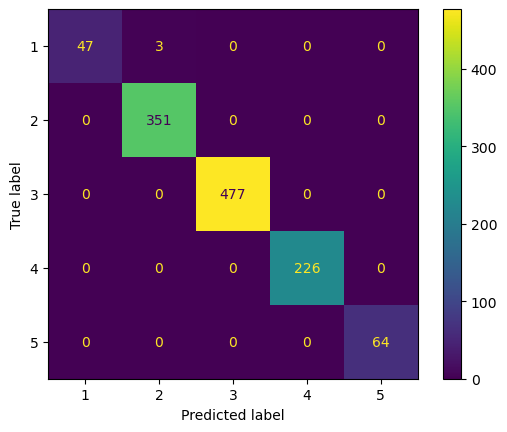

In [21]:
cm = confusion_matrix(y_test, y_pred, labels=search_normalized.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=search_normalized.classes_)
disp.plot()
plt.savefig('MC_NN.png')
plt.show()

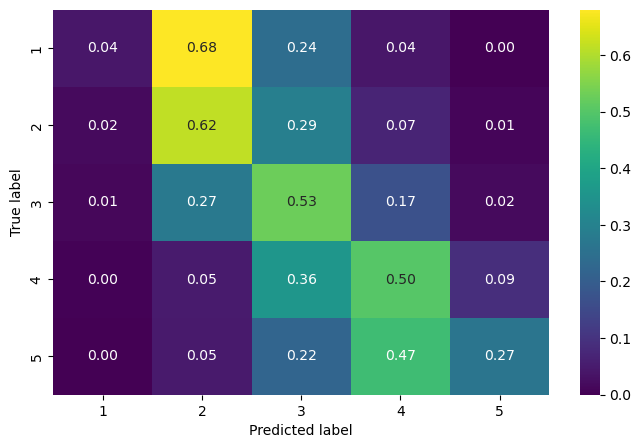

In [29]:
cm = confusion_matrix(y_test, y_pred, labels=search_normalized.classes_)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5], cmap="viridis")
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.savefig('MC_NN_Normalized.png')
plt.show(block=False)